# **RETAIL SALES DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

**STEP 1: IMPORTING THE DATASET AND EXPLORE IT**

In [276]:
sales = pd.read_csv("retail_sales_dataset.csv")
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [277]:
sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [278]:
sales.shape

(1000, 9)

In [279]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [280]:
sales.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [281]:
sales.duplicated().sum()

0

In [282]:
# Filter products with zero unit price
zero_price_products = sales[sales['Price per Unit'] == 0]

# Display the products with zero unit price
zero_price_products.shape[0]

0

In [283]:
# Filter rows where 'Quantity' is negative
returns = sales[sales['Quantity'] < 0]
returns.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [285]:
"""# ADD NEW COLUMNS TO ENRICH THE ORIGINAL DATASET

import numpy as np

# Set a fixed random seed for reproducibility
np.random.seed(42)

# Define the list of professions and their salary ranges
profession_salary_ranges = {
    "Engineer": (60000, 130000),
    "Teacher": (35000, 65000),
    "Artist": (25000, 70000),
    "Doctor": (80000, 180000),
    "Nurse": (50000, 90000),  # New profession added
    "Secretary": (28000, 50000),
    "Sales Person": (30000, 75000),
    "Mechanic": (30000, 60000),
    "Construction Worker": (25000, 55000),
    "IT Specialist": (50000, 120000)
}

# Function to generate a random income within the profession's range
def generate_average_income(profession):
    return np.random.randint(*profession_salary_ranges[profession])

# Add the new columns to the already loaded dataset
sales["Profession"] = np.random.choice(list(profession_salary_ranges.keys()), size=len(sales))
sales["Average Income"] = sales["Profession"].apply(generate_average_income)

# Save the updated dataset to a new CSV file (so it doesn't overwrite the original one)
sales.to_csv("sales_dataset.csv", index=False)

# Display the first rows to verify
sales.head()"""

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Profession,Average Income
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Sales Person,45328
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Doctor,136942
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mechanic,56215
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Nurse,83595
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Sales Person,57306


In [3]:
# Read the updated dataset
sales = pd.read_csv("sales_dataset.csv")
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Profession,Average Income
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Sales Person,45328
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Doctor,136942
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mechanic,56215
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Nurse,83595
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Sales Person,57306


In [4]:
# Convert the 'Date' column to datetime
sales['Date'] = pd.to_datetime(sales['Date'])

# Extract the month from the 'Date' column
sales['Month'] = sales['Date'].dt.month

sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Profession,Average Income,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Sales Person,45328,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Doctor,136942,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mechanic,56215,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Nurse,83595,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Sales Person,57306,5


In [5]:
# Bin the Age column to group it into age ranges
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
sales['Age Group'] = pd.cut(sales['Age'], bins=age_bins, labels=age_labels, right=False)

In [6]:
sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Profession', 'Average Income', 'Month', 'Age Group'],
      dtype='object')

In [7]:
sales.shape

(1000, 13)

In [6]:
# Select specific numeric columns
numeric_columns = ['Age','Quantity', 'Price per Unit', 'Total Amount', 'Average Income']

# Apply describe to the selected columns
sales[numeric_columns].describe()

,Age,Quantity,Price per Unit,Total Amount,Average Income
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000,66474.892000
std,13.68143,1.132734,189.681356,559.997632,31762.796021
min,18.00000,1.000000,25.000000,25.000000,25060.000000
25%,29.00000,1.000000,30.000000,60.000000,43799.250000
50%,42.00000,3.000000,50.000000,135.000000,57680.500000
75%,53.00000,4.000000,300.000000,900.000000,81830.750000
max,64.00000,4.000000,500.000000,2000.000000,179929.000000


General Summary:  
* *Age Distribution*: There is a mix of ages within the young adult to middle-aged range, with no extreme values.  
* *Purchase Behavior*: Most purchases consist of 1 or 2 products, with a relatively high unit price and some products that are either cheaper or more expensive.  
* *Transaction Behavior*: There is high variability in both the quantity of products per transaction and the total amount spent. This suggests that some customers make small purchases while others make much larger ones.  

**STEP 2: EXPLORATORY DATA ANALYSIS (EDA)**

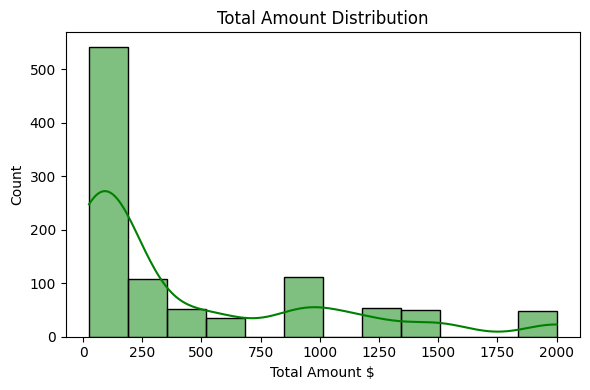

In [26]:
# Create a figure
plt.figure(figsize=(6, 4))

# Create the bar plot with 'Total Amount' on the x-axis and count on the y-axis
sns.histplot(sales['Total Amount'], kde=True, color= 'green')

# Add titles and labels
plt.title('Total Amount Distribution')
plt.xlabel('Total Amount $')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


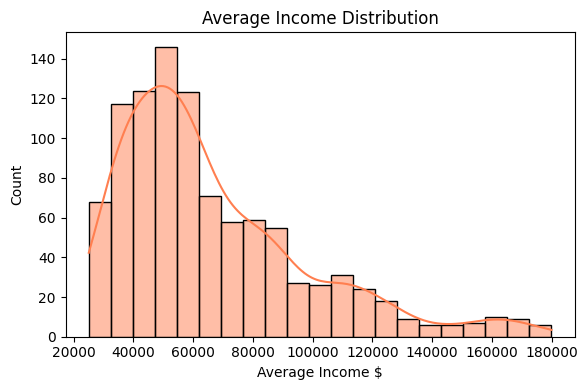

In [55]:
# Create a figure
plt.figure(figsize=(6, 4))

# Create the bar plot with 'Total Amount' on the x-axis and count on the y-axis
sns.histplot(sales['Average Income'], kde=True, color= 'coral')

# Add titles and labels
plt.title('Average Income Distribution')
plt.xlabel('Average Income $')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

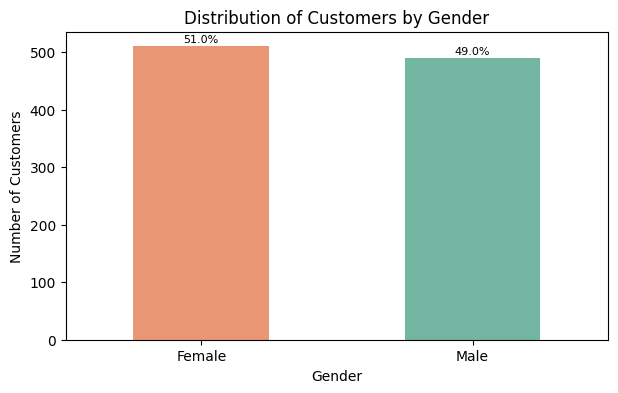

In [43]:
# Count the occurrences of each gender
gender_counts = sales['Gender'].value_counts()

# Calculate the percentage for each gender based on the total number of customers
gender_percentage = (gender_counts / gender_counts.sum()) * 100

# Create a bar plot for Gender with Set2 palette
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=[(0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.4, 0.7607843137254902, 0.6470588235294118)], width=0.5)

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    percentage = (height / gender_counts.sum()) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=8, color='black',
                xytext=(0, 5), textcoords='offset points')

# Add titles and labels
plt.title('Distribution of Customers by Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)

# Show the plot
plt.show()


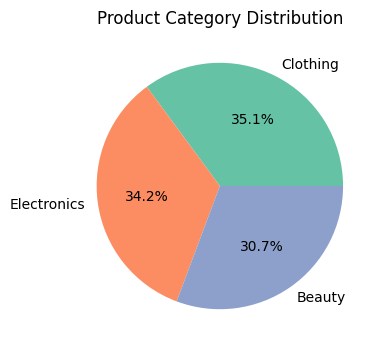

In [36]:
# Count the occurrences of each product category
pc_counts = sales['Product Category'].value_counts()

# Create a pie chart for Product Category
plt.figure(figsize=(4, 4))
plt.pie(pc_counts,
        labels=pc_counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("Set2", len(pc_counts)))
plt.title('Product Category Distribution', fontsize=12)
plt.show()

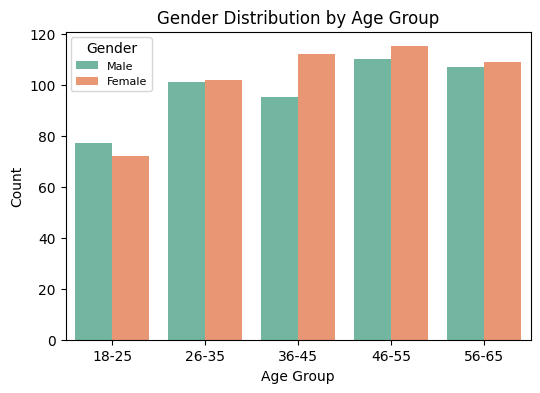

In [15]:
# First, let's bin the Age column to group it into age ranges
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
sales['Age Group'] = pd.cut(sales['Age'], bins=age_bins, labels=age_labels, right=False)

# Now we can create the stacked bar plot for Gender within Age and Quantity
plt.figure(figsize=(6, 4))

# Create the count plot for Age Group and Gender
sns.countplot(data=sales, x='Age Group', hue='Gender', palette='Set2')

# Add labels and title
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', fontsize=8)

# Show the plot
plt.show()

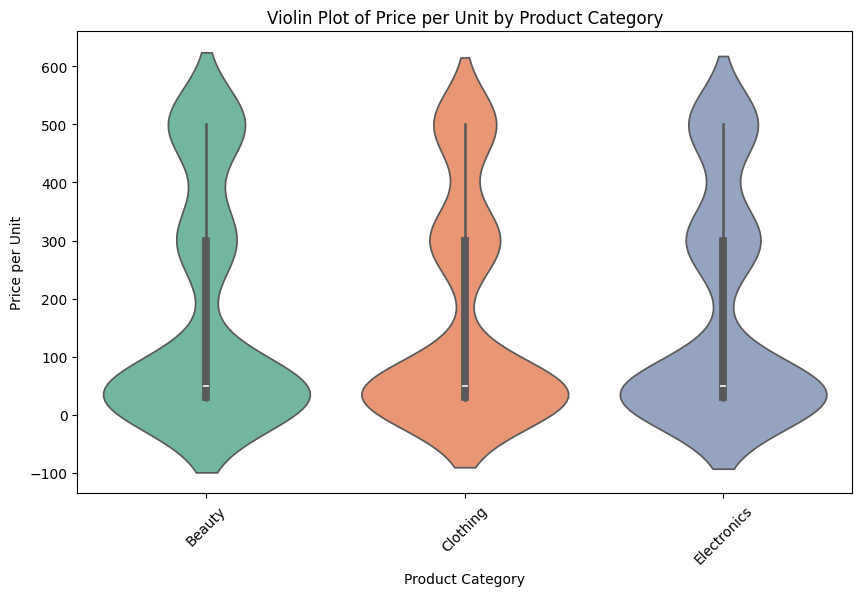

In [91]:
# Create a violin plot for Price per Unit by Product Category
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product Category', y='Price per Unit', data=sales, palette='Set2')
plt.title('Violin Plot of Price per Unit by Product Category')
plt.xticks(rotation=45)
plt.show()

       count        mean   min    25%    50%     75%     max
Month                                                       
1       78.0  474.102564  25.0   75.0  120.0   900.0  2000.0
2       85.0  518.352941  25.0   50.0  150.0  1000.0  2000.0
3       73.0  397.123288  25.0  100.0  150.0   500.0  2000.0
4       86.0  393.837209  25.0   50.0  100.0   575.0  2000.0
5      105.0  506.190476  25.0   60.0  150.0   900.0  2000.0
6       77.0  476.818182  25.0   50.0  120.0   900.0  2000.0
7       72.0  492.569444  25.0   90.0  175.0   900.0  2000.0
8       94.0  393.191489  25.0   60.0  120.0   500.0  2000.0
9       65.0  363.384615  25.0   75.0  120.0   300.0  2000.0
10      96.0  485.208333  25.0   75.0  135.0   900.0  2000.0
11      78.0  447.692308  25.0   75.0  100.0   900.0  2000.0
12      91.0  491.098901  25.0   55.0  200.0   900.0  2000.0


<ipython-input-16-b3bbd1615b88>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sales['Month'], y='Total Amount', data=sales, palette='tab20c')


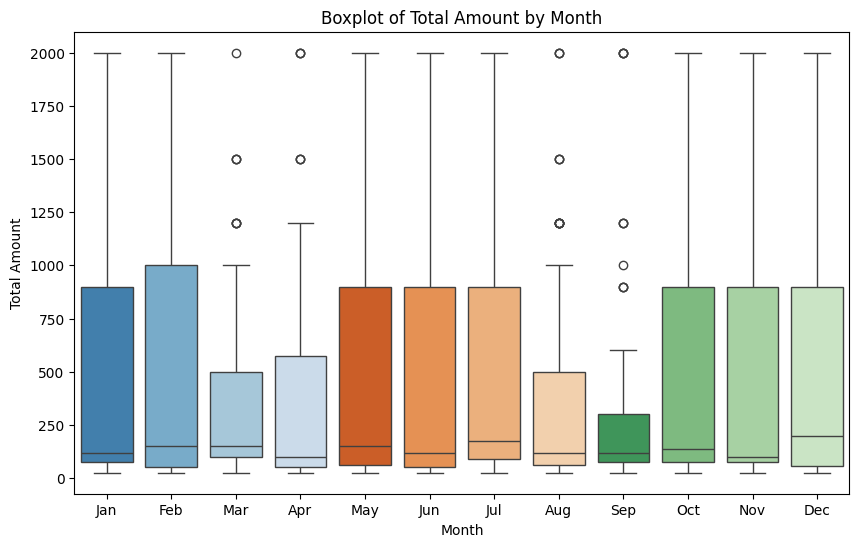

In [16]:
# Compute descriptive statistics for Total Amount by month
stats = sales.groupby('Month')['Total Amount'].describe()[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]
print(stats)  # Display statistics table

# Define month order for the plot
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Map numerical months to names for plotting only
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Create a boxplot with ordered months and 45-degree rotation, without changing the original 'Month' column
plt.figure(figsize=(10, 6))

# Convert 'Month' to categorical for plotting only
sns.boxplot(x=sales['Month'], y='Total Amount', data=sales, palette='tab20c')

# Set month labels to Jan, Feb, etc. for the plot
plt.xticks(ticks=range(12), labels=month_order)

plt.title('Boxplot of Total Amount by Month')
plt.show()

In [93]:
# Compute statistics for Total Amount by Gender
stats = sales.groupby('Gender')['Total Amount'].describe()[['mean', '25%', '50%', '75%']]
stats.rename(columns={'25%': 'Q1 (25%)', '50%': 'Median (50%)', '75%': 'Q3 (75%)'}, inplace=True)

# Compute IQR
stats['IQR'] = stats['Q3 (75%)'] - stats['Q1 (25%)']

# Display the table
print(stats)

              mean  Q1 (25%)  Median (50%)  Q3 (75%)    IQR
Gender                                                     
Female  456.549020      60.0         150.0     900.0  840.0
Male    455.428571      60.0         120.0     900.0  840.0


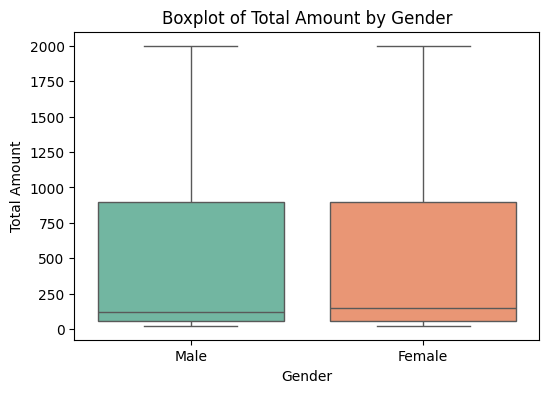

In [22]:
# Create a boxplot for Total Amount by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Total Amount', data=sales, palette='Set2')
plt.title('Boxplot of Total Amount by Gender')
plt.show()

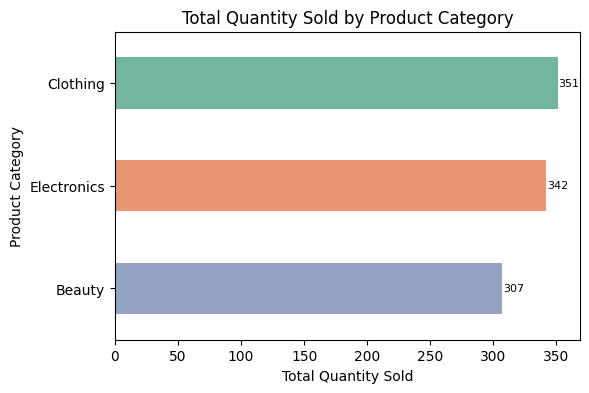

In [42]:
# Create a horizontal bar plot for Quantity by Product Category
plt.figure(figsize=(6, 4))
ax = sns.barplot(y=sales['Product Category'].value_counts().index,
                 x=sales['Product Category'].value_counts().values,
                 palette='Set2', width=0.5)

plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.title('Total Quantity Sold by Product Category', fontsize=12)

# Add text labels at the end of each bar
for p in ax.patches:
    ax.text(p.get_width() + 0.5,  # Position a little to the right of the bar
            p.get_y() + p.get_height() / 2,  # Centered on the y-axis
            int(p.get_width()),  # Value to display
            ha='left', va='center', fontsize=8, color='black')

plt.show()

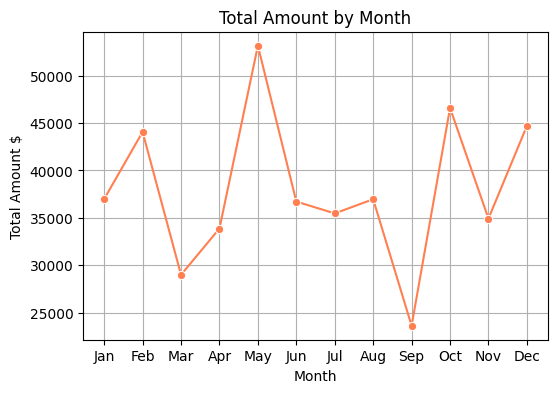

In [13]:
# Aggregate quantity sold per month
monthly_sales = sales.groupby('Month')['Total Amount'].sum().reset_index()

# Diccionario para mapear números de mes a nombres abreviados
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Reemplazar los números por los nombres de los meses
monthly_sales['Month'] = monthly_sales['Month'].map(month_names)

# Create a line plot for Quantity by Month
plt.figure(figsize=(6, 4))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o', color='coral')

plt.xlabel('Month')
plt.ylabel('Total Amount $')
plt.title('Total Amount by Month')

plt.grid(True)
plt.show()

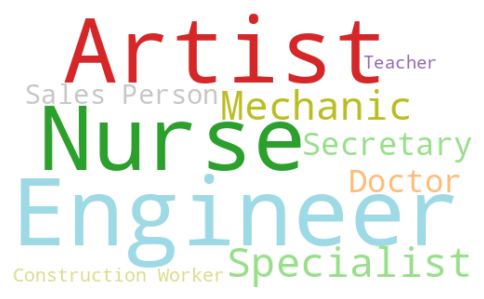

In [72]:
from wordcloud import WordCloud

# Generate the word cloud directly from the 'Profession' column
wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='tab20').generate(' '.join(sales['Profession'].dropna()))

# Display the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


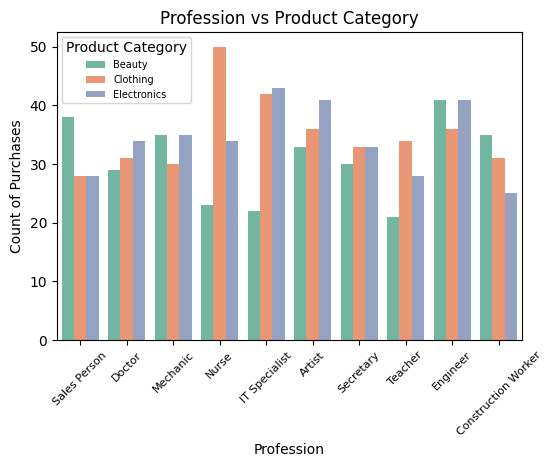

In [25]:
# Countplot to visualize the distribution of 'Product Category' by 'Profession'
plt.figure(figsize=(6, 4))
sns.countplot(data=sales, x='Profession', hue='Product Category', palette='Set2')
plt.xticks(rotation=45, fontsize=8)  # Rotate the x-axis labels by 45 degrees
plt.title('Profession vs Product Category')
plt.xlabel('Profession', fontsize=10)
plt.ylabel('Count of Purchases', fontsize=10)
plt.legend(title='Product Category', loc='upper left', fontsize=7)
plt.show()

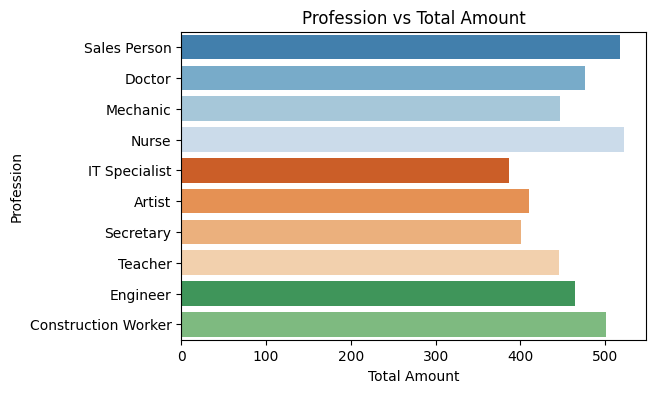

In [26]:
# Horizontal bar plot to compare 'Total Amount' by 'Profession'
plt.figure(figsize=(6, 4))
sns.barplot(data=sales, y='Profession', x='Total Amount', palette='tab20c', ci=None)
plt.title('Profession vs Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Profession')
plt.show()


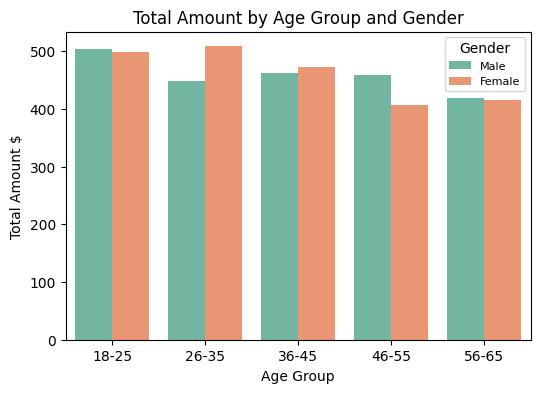

In [8]:
# Create a bar plot for Total Amount by Age Group and Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Age Group', y='Total Amount', hue='Gender', data=sales, palette='Set2', ci=None)

# Add labels and title
plt.title('Total Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Amount $')
plt.legend(title='Gender', fontsize=8)
plt.show()

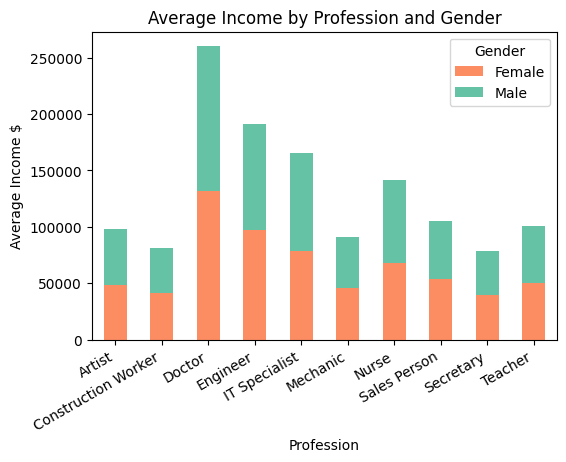

In [51]:
# Group and pivot the data to create stacked bars
income_profession_gender = sales.groupby(['Profession', 'Gender'])['Average Income'].mean().unstack()

# Define colors manually from Set2 (pink for Female, teal for Male)
custom_colors = ['#FC8D62', '#66C2A5']  # Set2: pink and teal

# Create the stacked bar chart
ax = income_profession_gender.plot(kind='bar', stacked=True, figsize=(6, 4), color=custom_colors)

# Customize the chart
plt.title('Average Income by Profession and Gender', fontsize=12)
plt.xlabel('Profession', fontsize=10)
plt.ylabel('Average Income $', fontsize=10)
plt.xticks(rotation=30, ha='right')  # Rotate labels and align them properly
plt.legend(title='Gender', labels=['Female', 'Male'])

# Show the chart
plt.show()

## **STEP 3: DATA PREPROCESSING**

In [98]:
sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Profession', 'Average Income', 'Month', 'Age Group'],
      dtype='object')

In [99]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on 'Total Amount' and 'Average Income1
stat_total_amount, p_value_total_amount = shapiro(sales['Total Amount'])
stat_avg_income, p_value_avg_income = shapiro(sales['Average Income'])

# Print results for 'Total Amount'
print(f"Shapiro-Wilk Test Statistic for Total Amount: {stat_total_amount:.4f}, p-value: {p_value_total_amount}")
if p_value_total_amount > 0.05:
    print("The 'Total Amount' column follows a normal distribution (p > 0.05).")
else:
    print("The 'Total Amount' column does NOT follow a normal distribution (p ≤ 0.05). Consider applying scaling or transformation.")

# Print results for 'Average Income'
print(f"Shapiro-Wilk Test Statistic for Average Income: {stat_avg_income:.4f}, p-value: {p_value_avg_income}")
if p_value_avg_income > 0.05:
    print("The 'Average Income' column follows a normal distribution (p > 0.05).")
else:
    print("The 'Average Income' column does NOT follow a normal distribution (p ≤ 0.05). Consider applying scaling or transformation.")


Shapiro-Wilk Test Statistic for Total Amount: 0.7489, p-value: 2.1785847545499362e-36
The 'Total Amount' column does NOT follow a normal distribution (p ≤ 0.05). Consider applying scaling or transformation.
Shapiro-Wilk Test Statistic for Average Income: 0.8841, p-value: 1.0975555295190822e-26
The 'Average Income' column does NOT follow a normal distribution (p ≤ 0.05). Consider applying scaling or transformation.


In [48]:
from sklearn.preprocessing import RobustScaler

# Define the feature set x
x = sales[['Total Amount', 'Average Income']].copy()

# Apply RobustScaler to the numerical column
scaler = RobustScaler()
x[['Total Amount', 'Average Income']] = scaler.fit_transform(x[['Total Amount', 'Average Income']])

# Display the first few rows of the scaled dataset
x.head()

,Total Amount,Average Income
0,0.017857,-0.324797
1,1.029762,2.084101
2,-0.125000,-0.038534
3,0.434524,0.681396
4,-0.041667,-0.009847


## **STEP 4: MACHINE LEARNING MODELLING**

#### **1) K-Means Method:**

📌 *Elbow Method:* to determine the optimal number of clusters for K-Means.  
📌 *inertia* measures the sum of squared distances between points and their cluster centroids, reflecting cluster compactness.
✔  We choose the K value where the decrease in inertia starts to slow down (the "elbow" point).  

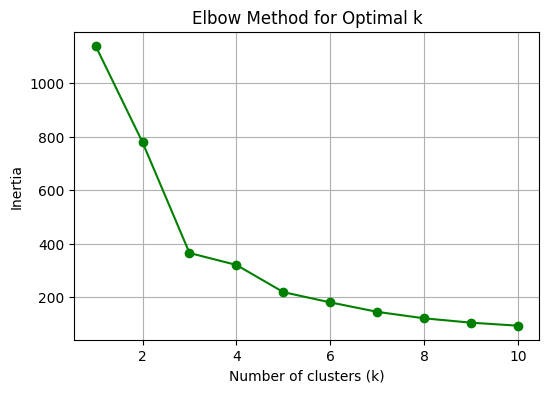

In [49]:
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o', color='green')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [50]:
# Apply K-means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
x['KMeans_Cluster'] = kmeans.fit_predict(x)

In [51]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score for K-Means
kmeans_score = silhouette_score(x, kmeans.labels_)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")

K-Means Silhouette Score: 0.6603


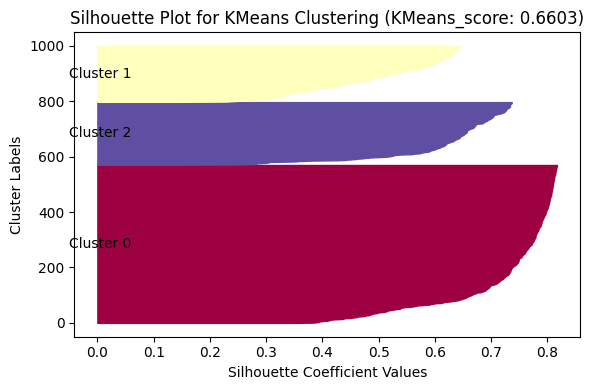

In [53]:
from sklearn.metrics import silhouette_samples

# Get the silhouette values for each sample
sample_silhouette_values = silhouette_samples(x, x['KMeans_Cluster'])

# Get the size of each cluster
cluster_sizes = x['KMeans_Cluster'].value_counts().sort_values(ascending=False)

# Sort the clusters based on size (from largest to smallest)
sorted_clusters = cluster_sizes.index

# Initialize the figure for the plot
plt.figure(figsize=(6, 4))

# Initialize variables for cluster positions
y_lower, y_upper = 0, 0
colors = plt.cm.Spectral(np.linspace(0, 1, len(sorted_clusters)))  # Colors for each cluster

# Plot the silhouette values for each cluster in order of size
for i in sorted_clusters:  # Loop over clusters sorted by size
    # Get the silhouette values for the cluster
    cluster_silhouette_values = sample_silhouette_values[x['KMeans_Cluster'] == i]
    cluster_silhouette_values.sort()

    y_upper += len(cluster_silhouette_values)
    # Plot the silhouette values for each cluster with its color
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, color=colors[i])
    # Label the clusters, starting from the largest
    plt.text(-0.05, (y_lower + y_upper) / 2, f"Cluster {i}", va='center', size=10, color='black')
    y_lower += len(cluster_silhouette_values)

# Add title and labels
plt.title(f"Silhouette Plot for KMeans Clustering (KMeans_score: {kmeans_score:.4f})")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Labels")
plt.tight_layout()

# Show the plot
plt.show()

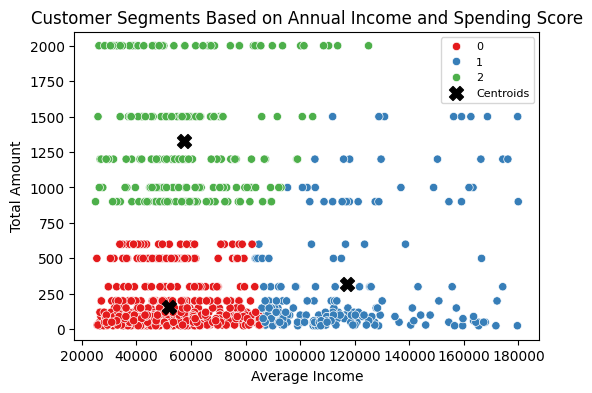

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

# 1. Select the relevant columns for clustering
x = sales[['Average Income', 'Total Amount']]

# 2. Scale the data
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

# 3. Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

# 4. Predict cluster labels
sales['KMeans_Cluster'] = kmeans.labels_

# 5. Get the centroids in the scaled space
centroids_scaled = kmeans.cluster_centers_

# 6. Convert the centroids back to the original scale
centroids_original = scaler.inverse_transform(centroids_scaled)

# 7. Plot the scatter plot of the data points (in the original scale)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=sales, x='Average Income', y='Total Amount', hue='KMeans_Cluster', palette='Set1')

# 8. Plot the centroids (in the original scale)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='black', s=100, marker='X', label='Centroids')

# 9. Add title and display legend
plt.title('Customer Segments Based on Average Income and Total Amount', fontsize=12)
plt.legend(fontsize=8)
plt.show()

In [106]:
# Group the data by KMeans Cluster and calculate descriptive statistics
cluster_summary = sales.groupby('KMeans_Cluster')[['Average Income', 'Total Amount']].describe()
cluster_summary

Average Income                                                  \
                        count           mean           std      min       25%   
KMeans_Cluster                                                                  
0                       571.0   52044.415061  15292.936446  25545.0  39424.00   
1                       202.0  117201.836634  25928.345782  83595.0  95113.75   
2                       227.0   57633.303965  19162.714646  25060.0  45649.50   

                                              Total Amount               \
                     50%        75%       max        count         mean   
KMeans_Cluster                                                            
0                51017.0   62199.50   85488.0        571.0   157.031524   
1               111945.0  128822.75  179929.0        202.0   321.955446   
2                54426.0   68349.00  125082.0        227.0  1327.312775   

                                                                   
                       std    min     25%     50%     75%     max  
KMeans_Cluster                                                     
0               162.411344   25.0    50.0   100.0   200.0   600.0  
1               409.683791   25.0    52.5   120.0   300.0  1500.0  
2               407.401982  900.0  1000.0  1200.0  1500.0  2000.0

**INTERPRETATION OF RESULTS**  
* **Cluster 1:** They have the highest income and a spending, indicating they are likely the wealthiest group, and they also tend to spend more. So, they can be seen as the "wealthy and high spenders".  

* **Cluster 2:** They have moderate income, but their spending is higher than the other two groups. This could indicate that they have a lifestyle with spending above their income, which makes them a more "spending" group in relative terms. They could be "moderate spenders but with a tendency to spend more."  

* **Cluster 0:** Although they have moderate income, their spending is much lower, suggesting they are more cost-conscious This group may be more focused on saving or more cautious with spending. They could be described as a group of "moderate income and moderate spenders."   

In [107]:
# Verify how many customers have each cluster
cluster_sizes = x['KMeans_Cluster'].value_counts()
print(cluster_sizes)

KMeans_Cluster
0    571
2    227
1    202
Name: count, dtype: int64


In [112]:
# Display all values for each cluster with additional details (for categorical columns)
for cluster in range(kmeans.n_clusters):
    print(f"Cluster {cluster} clients:")

    # Get the customers that belong to the current cluster
    cluster_customers = sales[sales['KMeans_Cluster'] == cluster]

    # Show all values for the categorical columns
    for column in ['Gender', 'Age Group', 'Profession', 'Product Category']:
        print(f"\nValues in '{column}' for Cluster {cluster}:")
        print(cluster_customers[column].value_counts())  # Display all categories with counts
    print("\n")


Cluster 0 clients:

Values in 'Gender' for Cluster 0:
Gender
Male      288
Female    283
Name: count, dtype: int64

Values in 'Age Group' for Cluster 0:
Age Group
56-65    130
26-35    121
36-45    120
46-55    120
18-25     80
Name: count, dtype: int64

Values in 'Profession' for Cluster 0:
Profession
Artist                 83
Mechanic               75
Secretary              75
Sales Person           66
Construction Worker    65
Nurse                  64
Teacher                60
IT Specialist          45
Engineer               33
Doctor                  5
Name: count, dtype: int64

Values in 'Product Category' for Cluster 0:
Product Category
Clothing       206
Electronics    187
Beauty         178
Name: count, dtype: int64


Cluster 1 clients:

Values in 'Gender' for Cluster 1:
Gender
Female    115
Male       87
Name: count, dtype: int64

Values in 'Age Group' for Cluster 1:
Age Group
46-55    54
56-65    42
26-35    39
36-45    39
18-25    28
Name: count, dtype: int64

Values in 'Pr

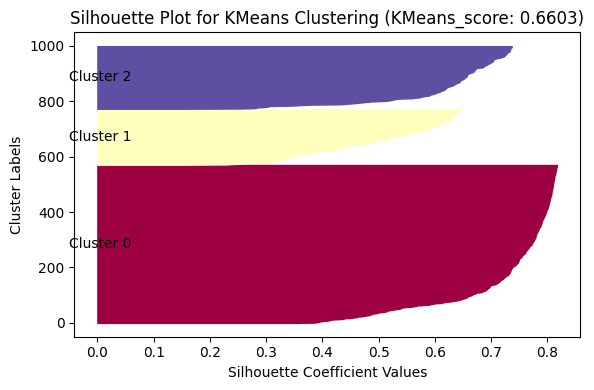

In [54]:
from sklearn.metrics import silhouette_samples

# Get the silhouette values for each sample
sample_silhouette_values = silhouette_samples(x, x['KMeans_Cluster'])
plt.figure(figsize=(6, 4))  # Create a figure with the appropriate size

# Initialize variables for the cluster positions
y_lower, y_upper = 0, 0
colors = plt.cm.Spectral(np.linspace(0, 1, 3))  # Create colors for each cluster (3 clusters)

for i in range(3):  # Loop over the number of clusters
    # Get the silhouette values for each cluster
    cluster_silhouette_values = sample_silhouette_values[x['KMeans_Cluster'] == i]
    cluster_silhouette_values.sort()

    y_upper += len(cluster_silhouette_values)
    # Plot the silhouette values for each cluster with color
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, color=colors[i])
    # Label the clusters, now starting from Cluster 0
    plt.text(-0.05, (y_lower + y_upper) / 2, f"Cluster {i}", va='center', size=10, color='black')
    y_lower += len(cluster_silhouette_values)

plt.title(f"Silhouette Plot for KMeans Clustering (KMeans_score: {kmeans_score:.4f})")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Labels")
plt.tight_layout()
plt.show()

In [110]:
# Display the first 10 customers for each cluster with additional details (for categorical columns)
for cluster in range(kmeans.n_clusters):
    print(f"Cluster {cluster + 1} clients:")

    # Get the customers that belong to the current cluster
    cluster_customers = sales[sales['KMeans_Cluster'] == cluster]

    # Show the most common values for the categorical columns
    for column in ['Gender', 'Age Group', 'Profession', 'Product Category']:
        print(f"\nMost common values in '{column}' for Cluster {cluster + 1}:")
        print(cluster_customers[column].value_counts().head(10))  # Display the top 10 most frequent categories
    print("\n")

Cluster 1 clients:

Most common values in 'Gender' for Cluster 1:
Gender
Male      288
Female    283
Name: count, dtype: int64

Most common values in 'Age Group' for Cluster 1:
Age Group
56-65    130
26-35    121
36-45    120
46-55    120
18-25     80
Name: count, dtype: int64

Most common values in 'Profession' for Cluster 1:
Profession
Artist                 83
Mechanic               75
Secretary              75
Sales Person           66
Construction Worker    65
Nurse                  64
Teacher                60
IT Specialist          45
Engineer               33
Doctor                  5
Name: count, dtype: int64

Most common values in 'Product Category' for Cluster 1:
Product Category
Clothing       206
Electronics    187
Beauty         178
Name: count, dtype: int64


Cluster 2 clients:

Most common values in 'Gender' for Cluster 2:
Gender
Female    115
Male       87
Name: count, dtype: int64

Most common values in 'Age Group' for Cluster 2:
Age Group
46-55    54
56-65    42
26-3

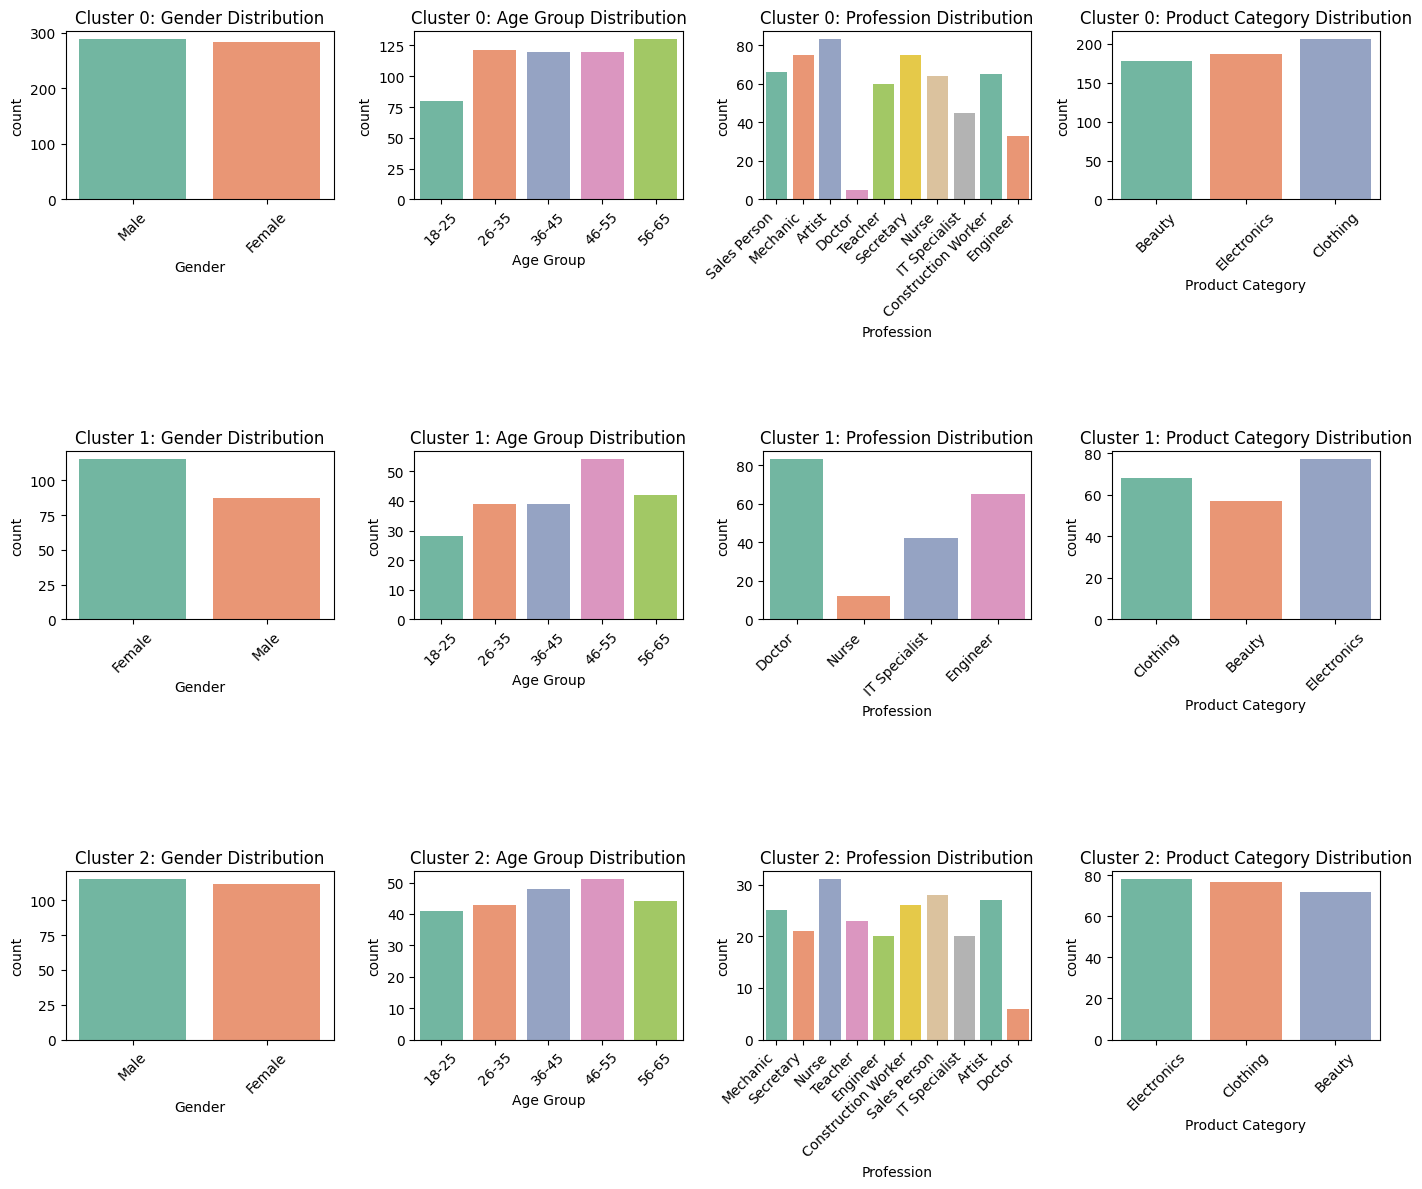

In [113]:
# Number of clusters
n_clusters = kmeans.n_clusters

# Create a figure for the plot
plt.figure(figsize=(14, 12))

# Loop through each cluster
for cluster in range(n_clusters):
    cluster_customers = sales[sales['KMeans_Cluster'] == cluster]

    # Loop through each categorical column to create a count plot
    for i, column in enumerate(['Gender', 'Age Group', 'Profession', 'Product Category']):
        plt.subplot(n_clusters, 4, cluster * 4 + i + 1)  # Create a subplot for each cluster and each column
        sns.countplot(data=cluster_customers, x=column, palette="Set2")
        plt.title(f"Cluster {cluster}: {column} Distribution")

        # Rotate x-axis labels for better readability
        if column == 'Profession':
            plt.xticks(rotation=45, ha='right')  # Rotate and align for 'Profession'
        else:
            plt.xticks(rotation=45)  # Rotate for other columns

# Adjust the layout for better spacing
plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=0.3)  # Increase horizontal and vertical space

# Show the plot
plt.show()

#### **2) APPLY DBSCAN (Density-Based Spatial Clustering of Applications with Noise) MODEL**

📌 *Optimal eps:* this method calculates the distance to the k-th nearest neighbor (usually 4th) for each data point. The optimal eps is typically chosen where the distance plot shows a significant increase, known as the "elbow."   
📌 *min_samples:* set to the dimensionality of the dataset + 1.  
✔ Important to apply DSCAN modeling

In [169]:
from sklearn.preprocessing import RobustScaler

# Define the feature set X_dbscan
x_dbscan = sales[['Total Amount', 'Average Income']].copy()

# Apply RobustScaler to the numerical columns
scaler = RobustScaler()
x_dbscan[['Total Amount', 'Average Income']] = scaler.fit_transform(x_dbscan[['Total Amount', 'Average Income']])

# Display the first few rows of the scaled dataset
x_dbscan.head()

,Total Amount,Average Income
0,0.017857,-0.324797
1,1.029762,2.084101
2,-0.125000,-0.038534
3,0.434524,0.681396
4,-0.041667,-0.009847


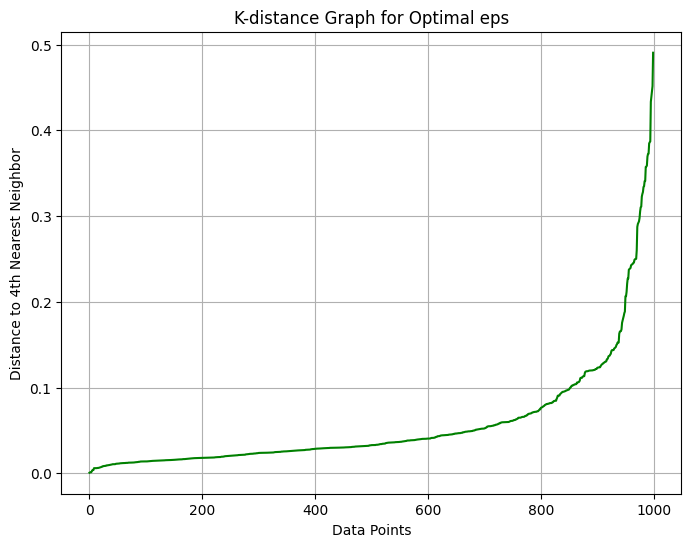

In [170]:
from sklearn.neighbors import NearestNeighbors

# Applying NearestNeighbors to calculate the distances of the k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=4)  # Using 4 because min_samples is 3 + 1
neighbors_fit = neighbors.fit(x_dbscan)
distances, indices = neighbors_fit.kneighbors(x_dbscan)

# Sorting the distances for better visualization
distances = np.sort(distances[:, 3], axis=0)  # Focusing on the 4th nearest neighbor

# Plotting the distance plot
plt.figure(figsize=(8, 6))
plt.plot(distances, color='green')
plt.title('K-distance Graph for Optimal eps')
plt.xlabel('Data Points')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.grid(True)
plt.show()

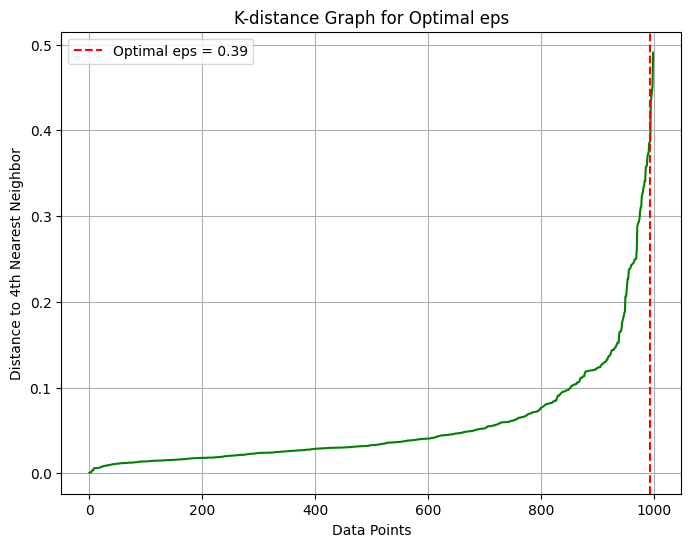

The optimal eps is: 0.39


In [171]:
# Calculating the differences between consecutive distances
distance_diff = np.diff(distances)

# Finding the index of the largest difference (this corresponds to the "elbow")
eps_index = np.argmax(distance_diff)

# Determining the optimal eps
optimal_eps = distances[eps_index]

# Plotting the K-distance graph
plt.figure(figsize=(8, 6))
plt.plot(distances, color='green')
plt.title('K-distance Graph for Optimal eps')
plt.xlabel('Data Points')
plt.ylabel('Distance to 4th Nearest Neighbor')

# Marking the optimal eps on the graph
plt.axvline(x=eps_index, color='r', linestyle='--', label=f'Optimal eps = {optimal_eps:.2f}')
plt.legend()
plt.grid(True)
plt.show()

# Printing the optimal eps value
print(f"The optimal eps is: {optimal_eps:.2f}")


In [172]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Applying DBSCAN with the optimal eps and min_samples
dbscan = DBSCAN(eps=0.39, min_samples=3)
dbscan_labels = dbscan.fit_predict(x_dbscan)

# Calculating the silhouette score to evaluate the clustering
DBSCAN_silhouette_score = silhouette_score(x_dbscan, dbscan_labels)
print(f"The Silhouette Score for DBSCAN is: {DBSCAN_silhouette_score:.4f}")


The Silhouette Score for DBSCAN is: 0.4414


In [173]:
# Assign DBSCAN cluster labels to the DataFrame
x_dbscan['DBSCAN_Cluster'] = dbscan_labels

In [176]:
from sklearn.metrics import silhouette_samples

# Calculate silhouette values for each sample
sample_silhouette_values = silhouette_samples(x_dbscan, x_dbscan['DBSCAN_Cluster'])

# Filter out the noise points (those with label -1)
cluster_labels = x_dbscan['DBSCAN_Cluster'] != -1  # Exclude noise points
sample_silhouette_values = sample_silhouette_values[cluster_labels]


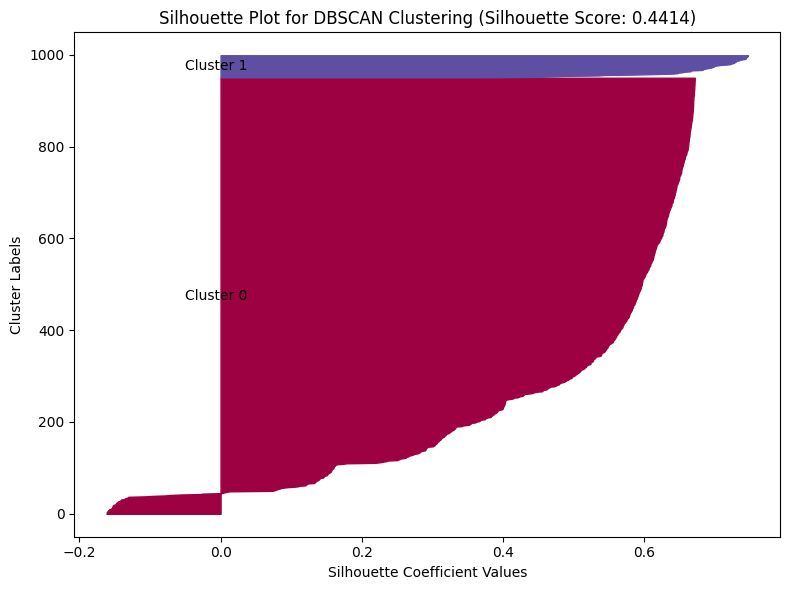

In [177]:
# Get the unique clusters excluding noise (-1)
unique_labels = np.unique(x_dbscan['DBSCAN_Cluster'])
unique_labels = unique_labels[unique_labels != -1]  # Exclude noise

# Define colors for the clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Initialize variables for the plot
y_lower = 0

plt.figure(figsize=(8, 6))  # Create a figure with the appropriate size

# Loop over each cluster to plot its silhouette values
for i, cluster in enumerate(unique_labels):
    # Get the silhouette values for this cluster
    cluster_silhouette_values = sample_silhouette_values[x_dbscan['DBSCAN_Cluster'] == cluster]
    cluster_silhouette_values.sort()

    y_upper = y_lower + len(cluster_silhouette_values)

    # Plot the silhouette values for each cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, color=colors[i])

    # Label the clusters
    plt.text(-0.05, (y_lower + y_upper) / 2, f"Cluster {cluster}", va='center', size=10, color='black')

    y_lower = y_upper  # Update y_lower for the next cluster

# Add title and labels
plt.title(f"Silhouette Plot for DBSCAN Clustering (Silhouette Score: {DBSCAN_silhouette_score:.4f})")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Labels")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

#### **3) APPLY HIERARCHICAL CLUSTERING MODEL (Agglomerative clustering)**

📌 *Dendrogram:* create it to find the optimal number of clusters  
📌


In [137]:
from sklearn.preprocessing import RobustScaler

# Define the feature set x_hc
x_hc = sales[['Total Amount', 'Average Income']].copy()

# Apply RobustScaler to the numerical columns
scaler = RobustScaler()
x_hc[['Total Amount', 'Average Income']] = scaler.fit_transform(x_hc[['Total Amount', 'Average Income']])

# Display the first few rows of the scaled dataset
x_hc.head()

,Total Amount,Average Income
0,0.017857,-0.324797
1,1.029762,2.084101
2,-0.125000,-0.038534
3,0.434524,0.681396
4,-0.041667,-0.009847


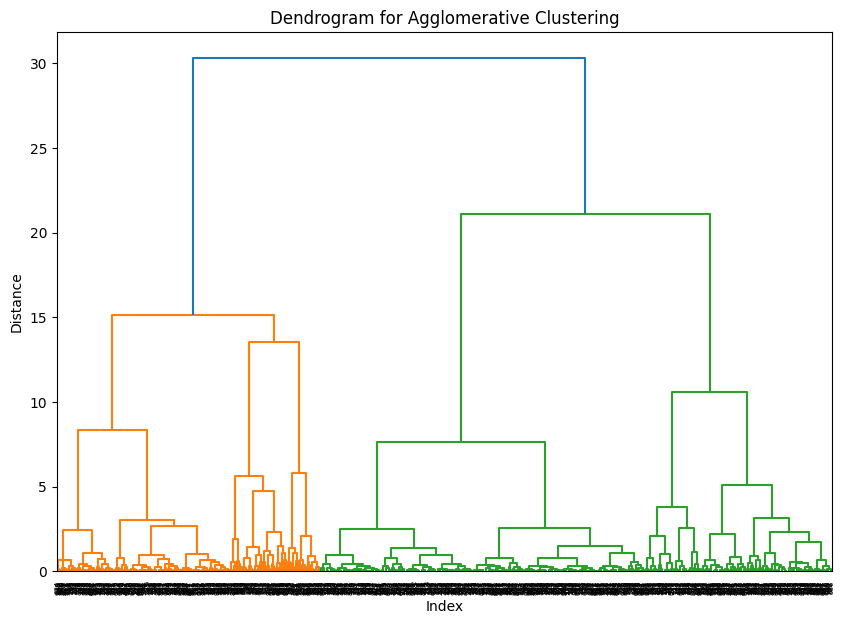

In [138]:
import scipy.cluster.hierarchy as sch

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(x_hc, method='ward'))

# Show the dendrogram plot
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

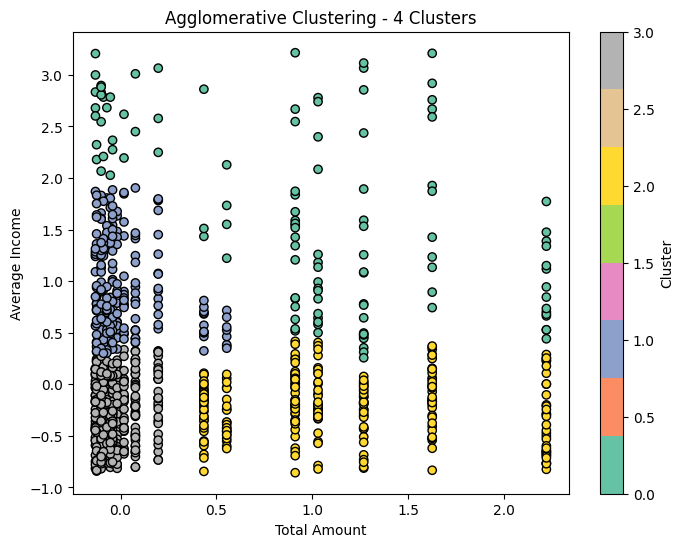

Hierarchical Clustering Silhouette Score: 0.4464


In [153]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Step 1: Define and apply the Agglomerative Clustering model
n_clusters = 4  # Using the number of clusters you determined from the dendrogram

# Create the Agglomerative Clustering model
agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model to the scaled data
clusters = agg_clust.fit_predict(x_hc)

# Step 2: Assign the cluster labels to the original data
x_hc['Cluster'] = clusters

# Step 3: Visualize the clusters (optional)
# Let's plot the clusters using a scatter plot to visualize how they are grouped

plt.figure(figsize=(8, 6))
plt.scatter(x_hc['Total Amount'], x_hc['Average Income'], c=x_hc['Cluster'], cmap='Set2', marker='o', edgecolor='k')
plt.title('Agglomerative Clustering - 4 Clusters')
plt.xlabel('Total Amount')
plt.ylabel('Average Income')
plt.colorbar(label='Cluster')
plt.show()

# Step 4: Calculate the silhouette score to evaluate clustering quality
hc_sil_score = silhouette_score(x_hc[['Total Amount', 'Average Income']], clusters)
print(f"Hierarchical Clustering Silhouette Score: {hc_sil_score:.4f}")


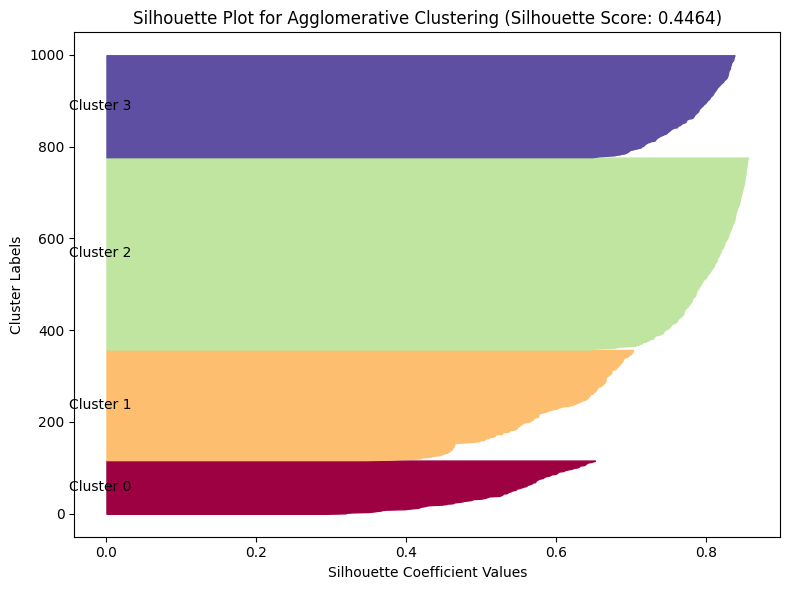

In [178]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering

# Step 1: Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4)
x_hc['Agglomerative Cluster'] = agg_clust.fit_predict(x_hc)

# Step 2: Calculate the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x_hc, x_hc['Agglomerative Cluster'])

# Step 3: Get the unique labels (clusters) for plotting, excluding noise if necessary
unique_labels = np.unique(x_hc['Agglomerative Cluster'])

# Step 4: Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Step 5: Initialize variables for the plot
y_lower = 0

plt.figure(figsize=(8, 6))  # Create a figure with the appropriate size

# Step 6: Loop over each cluster to plot its silhouette values
for i, cluster in enumerate(unique_labels):
    # Get the silhouette values for this cluster
    cluster_silhouette_values = sample_silhouette_values[x_hc['Agglomerative Cluster'] == cluster]
    cluster_silhouette_values.sort()

    y_upper = y_lower + len(cluster_silhouette_values)

    # Plot the silhouette values for each cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, color=colors[i])

    # Label the clusters
    plt.text(-0.05, (y_lower + y_upper) / 2, f"Cluster {cluster}", va='center', size=10, color='black')

    y_lower = y_upper  # Update y_lower for the next cluster

# Step 7: Add title and labels
plt.title(f"Silhouette Plot for Agglomerative Clustering (Silhouette Score: {hc_sil_score:.4f})")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Labels")

# Step 8: Adjust the layout and show the plot
plt.tight_layout()
plt.show()

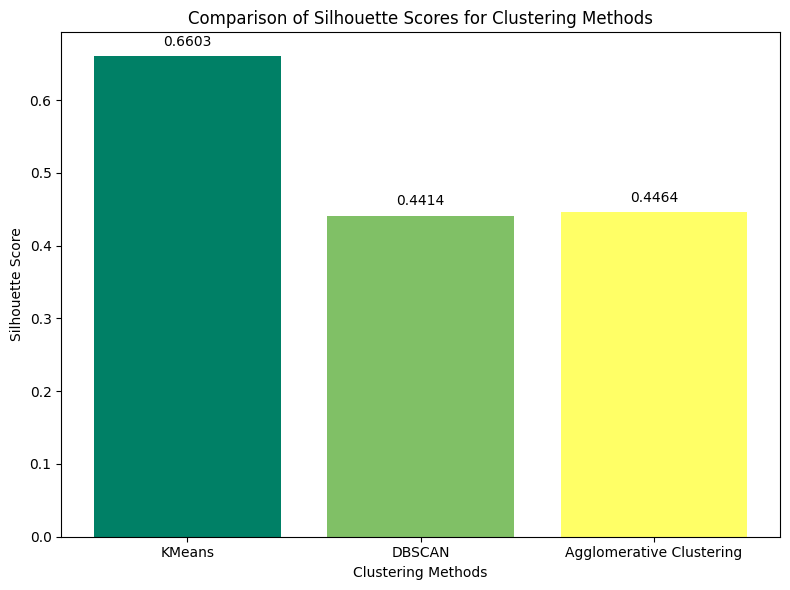

In [18]:
# Silhouette Scores for each model
silhouette_scores = [0.6603, 0.4414, 0.4464 ]
methods = ['KMeans', 'DBSCAN', 'Agglomerative Clustering']

# Create the bar chart with a color palette
colors = plt.cm.summer(np.linspace(0, 1, len(methods)))

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
bars = plt.bar(methods, silhouette_scores, color=colors)

# Add labels and title
plt.title('Comparison of Silhouette Scores for Clustering Methods')
plt.xlabel('Clustering Methods')
plt.ylabel('Silhouette Score')

# Display the values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()